<a href="https://colab.research.google.com/github/hakimozcan/Financial-Analysis/blob/main/ml_regression_crypto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Packages

In [ ]:
import pandas as pd
import os

# Import Data

In [ ]:
df = pd.read_csv('/content/sample_data/hash-rate.csv')
df.head()

,Timestamp,hash-rate
0,2020-04-16 00:00:00,1.188161e+08
1,2020-04-17 00:00:00,1.188161e+08
2,2020-04-18 00:00:00,1.150541e+08
3,2020-04-19 00:00:00,1.149496e+08
4,2020-04-20 00:00:00,1.148451e+08


In [ ]:
files = []

for _,_, file in os.walk("."):
  for file_name in file:
    if file_name.endswith("csv"):
      files.append(file_name)

files

['market-price.csv',
 'output-volume.csv',
 'hash-rate.csv',
 'transaction-fees.csv',
 'difficulty.csv',
 'cost-per-transaction-percent.csv',
 'n-transactions-total.csv',
 'miners-revenue.csv']

In [ ]:
dataframe = None

for file in files:
  if dataframe is None:
    dataframe = pd.read_csv(f"/content/sample_data/{file}",
                            names = ["time",
                                     file.replace(".csv", "")])

  else:

    temporary_dataframe = pd.read_csv(f"/content/sample_data/{file}",
                            names = ["time",
                                     file.replace(".csv", "")])

    dataframe = pd.merge(dataframe, temporary_dataframe)

dataframe

,time,market-price,output-volume,hash-rate,transaction-fees,difficulty,cost-per-transaction-percent,n-transactions-total,miners-revenue
0,Timestamp,market-price,output-volume,hash-rate,transaction-fees,difficulty,cost-per-transaction-percent,n-transactions-total,miners-revenue
1,2020-04-16 00:00:00,6623.8,1109195.64760975,118816054.72042187,28.64066108,14715214060657,1.05596023079332,521163188,13495677.8347836
2,2020-04-17 00:00:00,7112.27,945920.019087213,118816054.72042187,25.54078133,14715214060657,1.07920019666197,521486288,11584618.6908067
3,2020-04-18 00:00:00,7034.89,613279.302850086,115054068.8189837,19.2635742,14715214060657,2.74356730576726,521770657,14261973.7785588
4,2020-04-19 00:00:00,7259.36,547594.508733469,114949569.21061042,15.56965781,14715214060657,2.99704501552782,522059431,13731416.2140145
...,...,...,...,...,...,...,...,...,...
360,2021-04-10 00:00:00,58102.58,1540955.8423908053,167595961.6638289,89.98797300999999,23137439666472,1.0519324949964597,632633380,64092742.42249997
361,2021-04-11 00:00:00,59774,1369947.8337563388,171868015.58859318,62.98652347,23137439666472,1.465062970385971,632932905,58799840.659562446
362,2021-04-12 00:00:00,59964.87,1677284.9994405967,171703705.8222561,91.77267732999996,23137439666472,0.8124631071521698,633185692,59662203.17826638
363,2021-04-13 00:00:00,59834.74,1910823.298858516,169731988.62621102,101.82975420000001,23137439666472,0.6561472088723176,633477404,61441759.0375718


In [ ]:
dataframe = dataframe[1:]

dataframe

,time,market-price,output-volume,hash-rate,transaction-fees,difficulty,cost-per-transaction-percent,n-transactions-total,miners-revenue
1,2020-04-16 00:00:00,6623.8,1109195.64760975,118816054.72042187,28.64066108,14715214060657,1.05596023079332,521163188,13495677.8347836
2,2020-04-17 00:00:00,7112.27,945920.019087213,118816054.72042187,25.54078133,14715214060657,1.07920019666197,521486288,11584618.6908067
3,2020-04-18 00:00:00,7034.89,613279.302850086,115054068.8189837,19.2635742,14715214060657,2.74356730576726,521770657,14261973.7785588
4,2020-04-19 00:00:00,7259.36,547594.508733469,114949569.21061042,15.56965781,14715214060657,2.99704501552782,522059431,13731416.2140145
5,2020-04-20 00:00:00,7130.04,839780.608285255,114845069.60223714,21.97670283,14715214060657,1.45227938086876,522312894,14513595.7291591
...,...,...,...,...,...,...,...,...,...
360,2021-04-10 00:00:00,58102.58,1540955.8423908053,167595961.6638289,89.98797300999999,23137439666472,1.0519324949964597,632633380,64092742.42249997
361,2021-04-11 00:00:00,59774,1369947.8337563388,171868015.58859318,62.98652347,23137439666472,1.465062970385971,632932905,58799840.659562446
362,2021-04-12 00:00:00,59964.87,1677284.9994405967,171703705.8222561,91.77267732999996,23137439666472,0.8124631071521698,633185692,59662203.17826638
363,2021-04-13 00:00:00,59834.74,1910823.298858516,169731988.62621102,101.82975420000001,23137439666472,0.6561472088723176,633477404,61441759.0375718


In [ ]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364 entries, 1 to 364
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   time                          364 non-null    object
 1   market-price                  364 non-null    object
 2   output-volume                 364 non-null    object
 3   hash-rate                     364 non-null    object
 4   transaction-fees              364 non-null    object
 5   difficulty                    364 non-null    object
 6   cost-per-transaction-percent  364 non-null    object
 7   n-transactions-total          364 non-null    object
 8   miners-revenue                364 non-null    object
dtypes: object(9)
memory usage: 28.4+ KB


In [ ]:
dataframe["time"] = pd.to_datetime(dataframe["time"],
                                   format = "%Y-%m-%d %H:%M:%S")
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364 entries, 1 to 364
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   time                          364 non-null    datetime64[ns]
 1   market-price                  364 non-null    object        
 2   output-volume                 364 non-null    object        
 3   hash-rate                     364 non-null    object        
 4   transaction-fees              364 non-null    object        
 5   difficulty                    364 non-null    object        
 6   cost-per-transaction-percent  364 non-null    object        
 7   n-transactions-total          364 non-null    object        
 8   miners-revenue                364 non-null    object        
dtypes: datetime64[ns](1), object(8)
memory usage: 28.4+ KB


<ipython-input-8-381f73cc3c88>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe["time"] = pd.to_datetime(dataframe["time"],


In [ ]:
dataframe = dataframe.apply(pd.to_numeric,
                            errors="coerce")

dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 364 entries, 1 to 364
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   time                          364 non-null    int64  
 1   market-price                  364 non-null    float64
 2   output-volume                 364 non-null    float64
 3   hash-rate                     364 non-null    float64
 4   transaction-fees              364 non-null    float64
 5   difficulty                    364 non-null    float64
 6   cost-per-transaction-percent  364 non-null    float64
 7   n-transactions-total          364 non-null    int64  
 8   miners-revenue                364 non-null    float64
dtypes: float64(7), int64(2)
memory usage: 28.4 KB


In [ ]:
columns = list(dataframe.columns)

columns

['time',
 'market-price',
 'output-volume',
 'hash-rate',
 'transaction-fees',
 'difficulty',
 'cost-per-transaction-percent',
 'n-transactions-total',
 'miners-revenue']

In [ ]:
columns.remove("time")
columns

['market-price',
 'output-volume',
 'hash-rate',
 'transaction-fees',
 'difficulty',
 'cost-per-transaction-percent',
 'n-transactions-total',
 'miners-revenue']

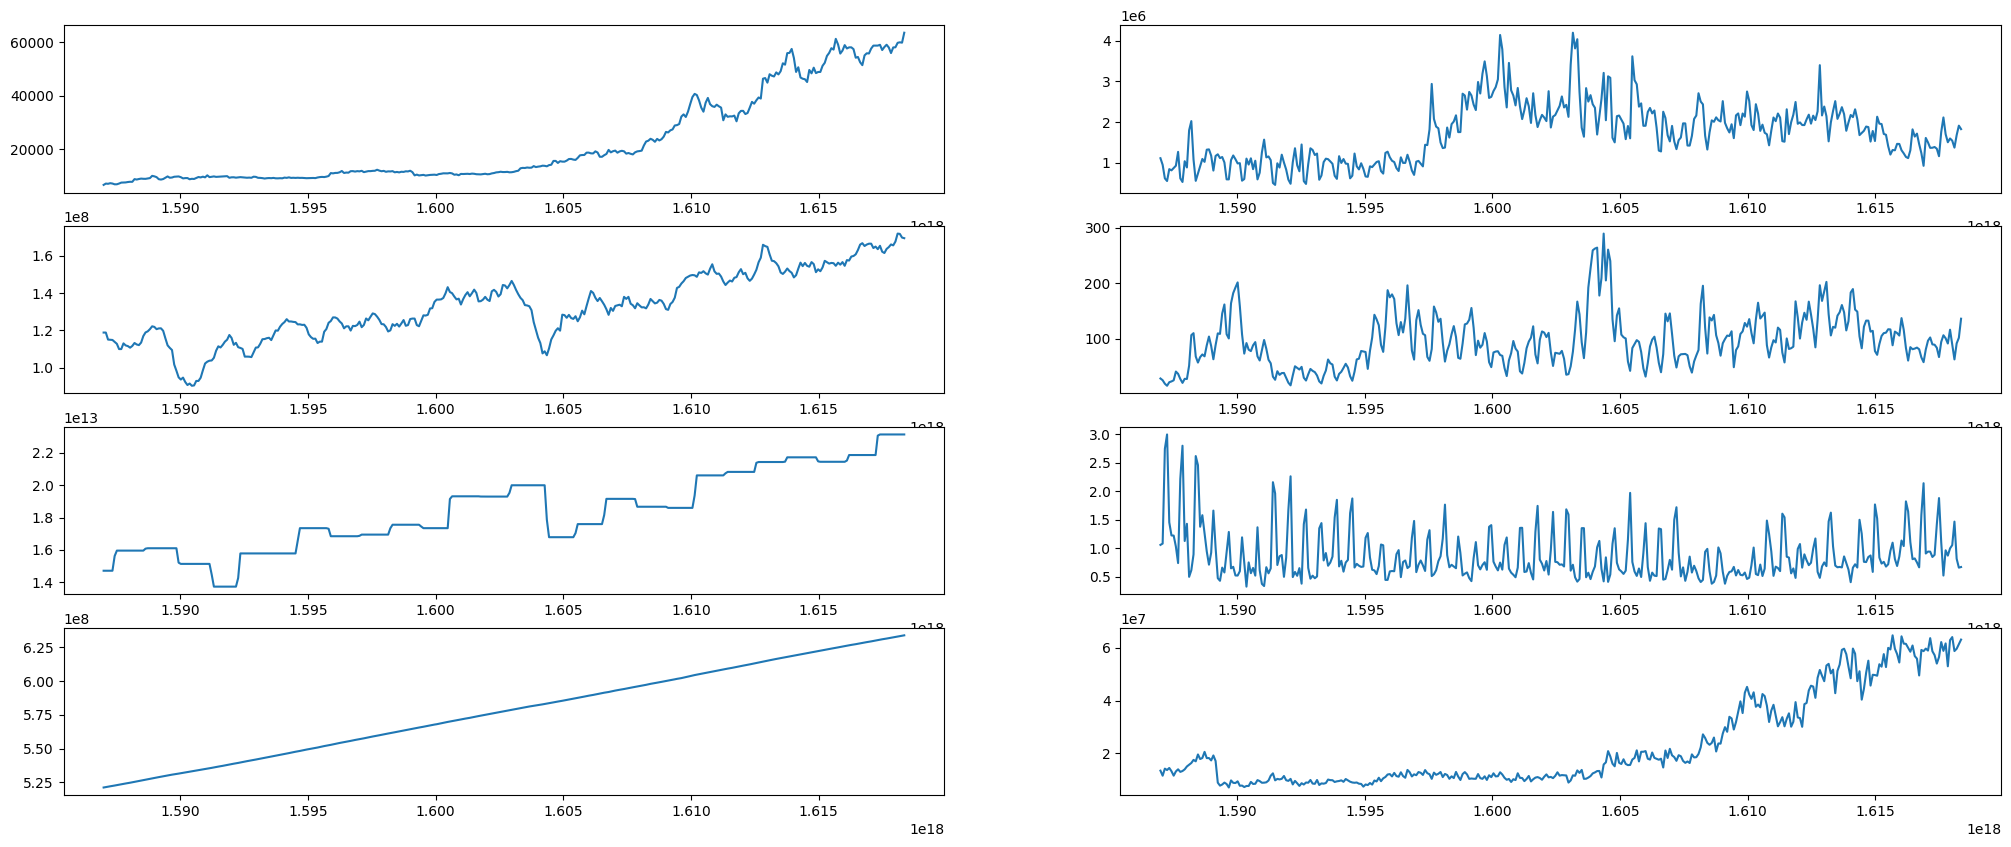

In [ ]:
import matplotlib.pyplot as pyplot

fig = pyplot.figure(figsize=(25,10))

cols = 2
rows = 4

for index in range(len(columns)):
  fig.add_subplot(rows, cols, index + 1)

  current_feature = columns[index]

  pyplot.plot(dataframe["time"],
              dataframe[current_feature])

pyplot.show()

In [ ]:
X = dataframe.iloc[:, 7:8]
X

,n-transactions-total
1,521163188
2,521486288
3,521770657
4,522059431
5,522312894
...,...
360,632633380
361,632932905
362,633185692
363,633477404


In [ ]:
y = dataframe.iloc[:, 1]
y

1       6623.80
2       7112.27
3       7034.89
4       7259.36
5       7130.04
         ...   
360    58102.58
361    59774.00
362    59964.87
363    59834.74
364    63554.44
Name: market-price, Length: 364, dtype: float64

In [ ]:
X = X.values
X

In [ ]:
y = y.values
y

In [ ]:
X.size == y.size

True

# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

LinearRegression()

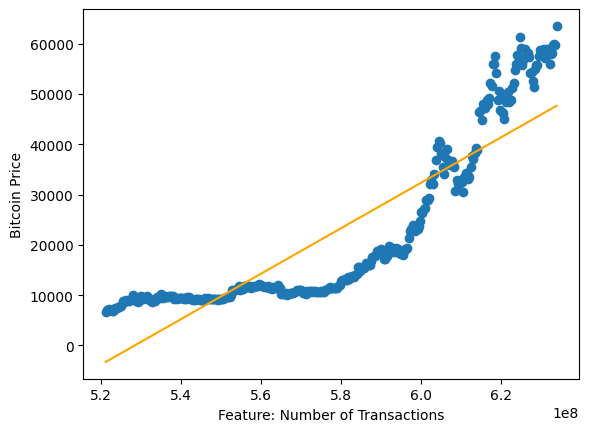

In [ ]:
pyplot.scatter(X, y)
pyplot.ylabel("Bitcoin Price")
pyplot.xlabel("Feature: Number of Transactions")

pyplot.plot(X, model.predict(X), color = "orange")

# Polynomial Regression

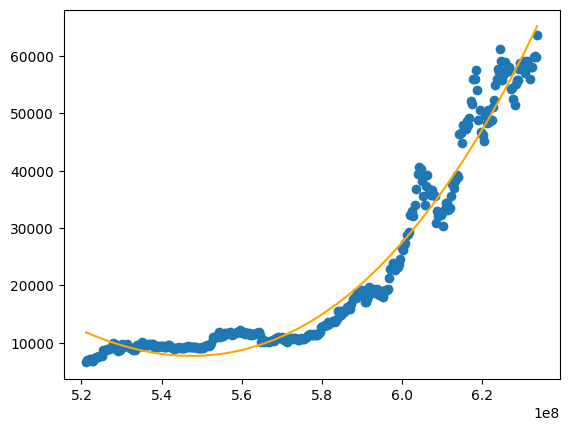

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_features = PolynomialFeatures(degree=4)
X_polynomial = polynomial_features.fit_transform(X)
polynomial_features.fit(X_polynomial, y)
linear_model = LinearRegression()
linear_model.fit(X_polynomial, y)

pyplot.scatter(X, y)
pyplot.plot(X, linear_model.predict(polynomial_features.fit_transform(X)),
            color = "orange")

One problem with linear models is we must explicitly add feature interactions. Other models we're about to use will be able to learn non-linear relationships between the features and targets. This includes random forests, gradient boosting, and neural networks.


The volume is essentially uncorrelated to movements in price, but combinations of volume and other features may add some predictive power.

Volume is simply the number of shares traded in a given time period; in our case, this is shares traded per day.